In [1]:
import pandas as pd
import numpy as np

import sklearn.feature_extraction.text as text
from sklearn import decomposition

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

import pickle

import nltk
from nltk.tokenize import wordpunct_tokenize
import pickle

ModuleNotFoundError: No module named 'pandas'

In [2]:
sandp500 = pd.read_csv('/Users/matthewvitha/Downloads/GSPC.csv')

In [3]:
sandp500.head(10)

,Date,Open,High,Low,Close,Adj Close,Avg,monthly_avg_return,Volume
0,9/14/18,2906.379883,2908.300049,2895.770020,2904.979980,2904.979980,2902.035035,0.022895,3149800000
1,9/13/18,2896.850098,2906.760010,2896.389893,2904.179932,2904.179932,2901.574952,0.029147,3254930000
2,9/12/18,2888.290039,2894.649902,2879.199951,2888.919922,2888.919922,2886.924927,0.019638,3264930000
3,9/11/18,2871.570068,2892.520020,2866.780029,2887.889893,2887.889893,2879.650025,0.012023,2899660000
4,9/10/18,2881.389893,2886.929932,2875.939941,2877.129883,2877.129883,2881.434937,0.006799,2731400000
5,9/7/18,2868.260010,2883.810059,2864.120117,2871.679932,2871.679932,2873.965088,0.004628,2946270000
6,9/6/18,2888.639893,2892.050049,2867.290039,2878.050049,2878.050049,2879.670044,0.009700,3139590000
7,9/5/18,2891.590088,2894.209961,2876.919922,2888.600098,2888.600098,2885.564942,0.016987,3241250000
8,9/4/18,2896.959961,2900.179932,2885.129883,2896.719971,2896.719971,2892.654908,0.024582,3077060000
9,8/31/18,2898.370117,2906.320068,2891.729980,2901.520020,2901.520020,2899.025024,0.031336,2880260000


In [4]:
sandp500['date2'] = pd.to_datetime(sandp500.Date, errors='coerce').dt.to_period("M")

In [5]:
sandp500.head(3)

,Date,Open,High,Low,Close,Adj Close,Avg,monthly_avg_return,Volume,date2
0,9/14/18,2906.379883,2908.300049,2895.770020,2904.979980,2904.979980,2902.035035,0.022895,3149800000,2018-09
1,9/13/18,2896.850098,2906.760010,2896.389893,2904.179932,2904.179932,2901.574952,0.029147,3254930000,2018-09
2,9/12/18,2888.290039,2894.649902,2879.199951,2888.919922,2888.919922,2886.924927,0.019638,3264930000,2018-09


In [6]:
sandp500.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9546 entries, 0 to 9545
Data columns (total 10 columns):
Date                  9546 non-null object
Open                  9546 non-null float64
High                  9546 non-null float64
Low                   9546 non-null float64
Close                 9546 non-null float64
Adj Close             9546 non-null float64
Avg                   9546 non-null float64
monthly_avg_return    9546 non-null float64
Volume                9546 non-null int64
date2                 9546 non-null object
dtypes: float64(7), int64(1), object(2)
memory usage: 745.9+ KB


In [7]:
sandp500[['monthly_avg_return']] = sandp500[['monthly_avg_return']].apply(pd.to_numeric)


In [8]:
gb=sandp500.groupby(['date2'])
gb_sandp500_month=gb.agg({'monthly_avg_return':'mean'})


In [9]:
gb_sandp500_month.head(5)


,monthly_avg_return
date2,
1980-11,0.008098
1980-12,-0.016682
1981-01,-0.002506
1981-02,-0.038466
1981-03,0.035670


In [30]:
largecaps = pd.read_csv('/Users/matthewvitha/Downloads/sandp500_largecaps.csv')

In [31]:
largecaps.head(3)

,Date,aapl_monthly_returns,xom_monthly_returns,jnj_monthly_returns,jpm_monthly_returns,ibm_monthly_returns
0,9/14/18,0.072919,0.052625,0.075552,-0.004242,0.036024
1,9/13/18,0.077081,0.044759,0.071908,-0.012625,0.032388
2,9/12/18,0.069918,0.052216,0.063615,-0.012574,0.017512


In [32]:
largecaps['date2'] = pd.to_datetime(largecaps.Date, errors='coerce').dt.to_period("M")

In [33]:
largecaps.head(3)

,Date,aapl_monthly_returns,xom_monthly_returns,jnj_monthly_returns,jpm_monthly_returns,ibm_monthly_returns,date2
0,9/14/18,0.072919,0.052625,0.075552,-0.004242,0.036024,2018-09
1,9/13/18,0.077081,0.044759,0.071908,-0.012625,0.032388,2018-09
2,9/12/18,0.069918,0.052216,0.063615,-0.012574,0.017512,2018-09


In [38]:
largecaps.iloc[:,1:5] = largecaps.iloc[:,1:5].apply(pd.to_numeric)

In [39]:
largecaps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9522 entries, 0 to 9521
Data columns (total 7 columns):
Date                    9522 non-null object
aapl_monthly_returns    9522 non-null float64
xom_monthly_returns     9522 non-null float64
jnj_monthly_returns     9522 non-null float64
jpm_monthly_returns     9522 non-null float64
ibm_monthly_returns     9522 non-null float64
date2                   9522 non-null object
dtypes: float64(5), object(2)
memory usage: 520.8+ KB


In [40]:
largecaps.head(2)

,Date,aapl_monthly_returns,xom_monthly_returns,jnj_monthly_returns,jpm_monthly_returns,ibm_monthly_returns,date2
0,9/14/18,0.072919,0.052625,0.075552,-0.004242,0.036024,2018-09
1,9/13/18,0.077081,0.044759,0.071908,-0.012625,0.032388,2018-09


In [43]:
gb_largecaps=largecaps.groupby(['date2'])


In [46]:
gb_aggs1 = gb_largecaps.agg({'aapl_monthly_returns':'mean','xom_monthly_returns':'mean','jnj_monthly_returns':'mean','jpm_monthly_returns':'mean','ibm_monthly_returns':'mean'})

In [47]:
gb_aggs1.head(3)

,jpm_monthly_returns,aapl_monthly_returns,jnj_monthly_returns,ibm_monthly_returns,xom_monthly_returns
date2,,,,,
1980-12,0.014283,0.088937,0.084214,-0.052143,-0.042286
1981-01,0.150932,0.075984,0.044634,0.001949,-0.037677
1981-02,0.058339,-0.175601,0.000431,-0.061232,-0.075653


In [48]:
df_new = pickle.load( open('nyt_nmf_qdates','rb'))
df_new.reset_index(drop=True,inplace=True)

In [49]:
df_new['date2'] = pd.to_datetime(df_new.url_date, errors='coerce').dt.to_period("M")

In [50]:
df_new.head(2)

,url,article,url_date,tfidf_nmf_10,date,date2
0,https://www.nytimes.com/2001/01/16/nyregion/c-...,A chart of financial indicators at the bottom ...,2001-01-16,3,2001Q4,2001-01
1,https://www.nytimes.com/2018/07/09/opinion/tru...,"According to early indications, recent U.S. ec...",2018-07-09,6,2019Q2,2018-07


In [51]:
df_new.shape

(27958, 6)

In [52]:
doctopic = pickle.load( open('doctopic_kojak','rb'))

In [53]:
print(doctopic.shape)
print(type(doctopic))

(27958, 10)
<class 'numpy.ndarray'>


In [54]:
doctopic_df = pd.DataFrame(doctopic)
doctopic_df.reset_index(drop=True,inplace=True)
doctopic_df.columns = ['topic0','topic1','topic2','topic3','topic4','topic5','topic6','topic7','topic8','topic9']

In [55]:
df_new2 = pd.concat([df_new, doctopic_df],axis=1)

In [56]:
df_new2.head(3)

,url,article,url_date,tfidf_nmf_10,date,date2,topic0,topic1,topic2,topic3,topic4,topic5,topic6,topic7,topic8,topic9
0,https://www.nytimes.com/2001/01/16/nyregion/c-...,A chart of financial indicators at the bottom ...,2001-01-16,3,2001Q4,2001-01,0.003277,0.000000,0.000000,0.041802,0.001132,0.000000,0.000000,0.000578,0.000000,0.007085
1,https://www.nytimes.com/2018/07/09/opinion/tru...,"According to early indications, recent U.S. ec...",2018-07-09,6,2019Q2,2018-07,0.009719,0.004222,0.007068,0.005291,0.023363,0.040490,0.048582,0.000000,0.001266,0.000000
2,https://www.nytimes.com/2008/01/22/business/wo...,"The Federal Reserve, responding to an internat...",2008-01-22,3,2008Q4,2008-01,0.000773,0.000000,0.019538,0.080470,0.000000,0.058395,0.000000,0.000000,0.011522,0.000000


In [57]:
gb=df_new2.groupby(['date2'])
gb_aggs=gb.agg({'topic0':'mean','topic1':'mean','topic2':'mean','topic3':'mean','topic4':'mean','topic5':'mean','topic6':'mean','topic7':'mean','topic8':'mean','topic9':'mean'})
gb_aggs.head()

,topic5,topic8,topic0,topic9,topic1,topic7,topic3,topic2,topic4,topic6
date2,,,,,,,,,,
1982-01,0.005591,0.011621,0.011099,0.009398,0.012358,0.015621,0.005772,0.015551,0.014494,0.013190
1982-02,0.010766,0.013584,0.006406,0.011436,0.013169,0.013006,0.008598,0.018591,0.008852,0.023805
1982-03,0.007229,0.016423,0.009945,0.012006,0.012897,0.013127,0.004926,0.011588,0.007485,0.017642
1982-04,0.007928,0.015714,0.010957,0.009311,0.013974,0.009719,0.004337,0.011920,0.010770,0.017182
1982-05,0.011332,0.013771,0.012330,0.013299,0.011184,0.009473,0.006210,0.011785,0.012932,0.009435


In [58]:
df_kojak_monthly = pd.read_csv('/Users/matthewvitha/Downloads/Kojak_Monthly_sp500.csv')

In [59]:
df_kojak_monthly.head(3)

,DATE,BAA10YM,BAA10YM_PCH,CEU3000000001,CEU3000000001_PCH,CSUSHPISA,CSUSHPISA_PCH,DGORDER,DGORDER_PCH,FEDFUNDS,...,PCEPI,PCEPI_PCH,T10Y2YM,T10Y2YM_PCH,TWEXBMTH,TWEXBMTH_PCH,UMCSENT,UMCSENT_PCH,UNRATE,UNRATE_PCH
0,1980-01-01,1.62,-3.0,19132.0,-1.0,NaN,NaN,NaN,NaN,13.82,...,39.349,1.0,-0.70,-30.0,35.8600,-0.1,67.0,9.8,6.3,5.0
1,1980-02-01,1.16,-28.4,19083.0,-0.3,NaN,NaN,NaN,NaN,14.13,...,39.776,1.1,-1.01,44.3,36.2089,1.0,66.9,-0.1,6.3,0.0
2,1980-03-01,1.70,46.6,19139.0,0.3,NaN,NaN,NaN,NaN,17.19,...,40.264,1.2,-2.13,110.9,37.1465,2.6,56.5,-15.5,6.3,0.0


In [60]:
df_kojak_monthly['date2'] = pd.to_datetime(df_kojak_monthly.DATE, format='%Y-%m',errors='ignore')

In [61]:
df_kojak_monthly['date2'] = df_kojak_monthly['date2'].dt.to_period('M')

In [62]:
df_kojak_monthly.head(2)

,DATE,BAA10YM,BAA10YM_PCH,CEU3000000001,CEU3000000001_PCH,CSUSHPISA,CSUSHPISA_PCH,DGORDER,DGORDER_PCH,FEDFUNDS,...,PCEPI_PCH,T10Y2YM,T10Y2YM_PCH,TWEXBMTH,TWEXBMTH_PCH,UMCSENT,UMCSENT_PCH,UNRATE,UNRATE_PCH,date2
0,1980-01-01,1.62,-3.0,19132.0,-1.0,NaN,NaN,NaN,NaN,13.82,...,1.0,-0.70,-30.0,35.8600,-0.1,67.0,9.8,6.3,5.0,1980-01
1,1980-02-01,1.16,-28.4,19083.0,-0.3,NaN,NaN,NaN,NaN,14.13,...,1.1,-1.01,44.3,36.2089,1.0,66.9,-0.1,6.3,0.0,1980-02


In [66]:
df_sandp500 = pd.merge(df_kojak_monthly, gb_aggs,on='date2')

In [68]:
df_sandp500_largecaps = pd.merge(df_sandp500, gb_aggs1,on='date2')

In [69]:
df_sandp500_largecaps.head(3)

,DATE,BAA10YM,BAA10YM_PCH,CEU3000000001,CEU3000000001_PCH,CSUSHPISA,CSUSHPISA_PCH,DGORDER,DGORDER_PCH,FEDFUNDS,...,topic7,topic3,topic2,topic4,topic6,jpm_monthly_returns,aapl_monthly_returns,jnj_monthly_returns,ibm_monthly_returns,xom_monthly_returns
0,1982-01-01,2.51,-11.3,17874.0,-1.8,NaN,NaN,NaN,NaN,13.22,...,0.015621,0.005772,0.015551,0.014494,0.013190,-0.070086,-0.000816,-0.007282,0.090480,-0.041724
1,1982-02-01,2.75,9.6,17826.0,-0.3,NaN,NaN,NaN,NaN,14.78,...,0.013006,0.008598,0.018591,0.008852,0.023805,0.033570,-0.055695,0.053442,0.053253,-0.044803
2,1982-03-01,2.96,7.6,17762.0,-0.4,NaN,NaN,NaN,NaN,14.68,...,0.013127,0.004926,0.011588,0.007485,0.017642,0.021048,-0.127757,-0.049851,-0.049482,-0.013031


In [71]:
df_sandp500_largecaps.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 440 entries, 0 to 439
Data columns (total 47 columns):
DATE                    440 non-null object
BAA10YM                 440 non-null float64
BAA10YM_PCH             440 non-null float64
CEU3000000001           440 non-null float64
CEU3000000001_PCH       440 non-null float64
CSUSHPISA               378 non-null float64
CSUSHPISA_PCH           377 non-null float64
DGORDER                 318 non-null float64
DGORDER_PCH             317 non-null float64
FEDFUNDS                440 non-null float64
FEDFUNDS_PCH            440 non-null float64
INDPRO                  440 non-null float64
INDPRO_PCH              440 non-null float64
M2SL                    440 non-null float64
M2SL_PCH                440 non-null float64
MCOILWTICO              392 non-null float64
MCOILWTICO_PCH          391 non-null float64
MICH                    439 non-null float64
MICH_PCH                439 non-null float64
PAYEMS                  440 non-null floa

In [73]:
df_sandp500_largecaps1 = pd.merge(df_sandp500_largecaps, gb_sandp500_month,on='date2')

In [74]:
df_sandp500_largecaps1.head(3)

,DATE,BAA10YM,BAA10YM_PCH,CEU3000000001,CEU3000000001_PCH,CSUSHPISA,CSUSHPISA_PCH,DGORDER,DGORDER_PCH,FEDFUNDS,...,topic3,topic2,topic4,topic6,jpm_monthly_returns,aapl_monthly_returns,jnj_monthly_returns,ibm_monthly_returns,xom_monthly_returns,monthly_avg_return
0,1982-01-01,2.51,-11.3,17874.0,-1.8,NaN,NaN,NaN,NaN,13.22,...,0.005772,0.015551,0.014494,0.013190,-0.070086,-0.000816,-0.007282,0.090480,-0.041724,-0.053631
1,1982-02-01,2.75,9.6,17826.0,-0.3,NaN,NaN,NaN,NaN,14.78,...,0.008598,0.018591,0.008852,0.023805,0.033570,-0.055695,0.053442,0.053253,-0.044803,-0.026613
2,1982-03-01,2.96,7.6,17762.0,-0.4,NaN,NaN,NaN,NaN,14.68,...,0.004926,0.011588,0.007485,0.017642,0.021048,-0.127757,-0.049851,-0.049482,-0.013031,-0.035232


In [75]:
df_sandp500_largecaps1.shape

(440, 48)

In [77]:
smaller_df= df_sandp500_largecaps1.loc[:,['date2','PCEPI_PCH','INDPRO_PCH','T10Y2YM_PCH','CEU3000000001_PCH','M2SL_PCH','MCOILWTICO_PCH','PAYEMS_PCH','UMCSENT_PCH','UNRATE_PCH','BAA10YM_PCH','CSUSHPISA_PCH','DGORDER_PCH','TWEXBMTH_PCH','monthly_avg_return','jpm_monthly_returns','aapl_monthly_returns','jnj_monthly_returns','ibm_monthly_returns','xom_monthly_returns','topic0','topic1','topic2','topic3','topic4','topic5','topic6','topic7','topic8','topic9']] 

In [78]:
smaller_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 440 entries, 0 to 439
Data columns (total 30 columns):
date2                   440 non-null object
PCEPI_PCH               439 non-null float64
INDPRO_PCH              440 non-null float64
T10Y2YM_PCH             439 non-null float64
CEU3000000001_PCH       440 non-null float64
M2SL_PCH                440 non-null float64
MCOILWTICO_PCH          391 non-null float64
PAYEMS_PCH              440 non-null float64
UMCSENT_PCH             439 non-null float64
UNRATE_PCH              440 non-null float64
BAA10YM_PCH             440 non-null float64
CSUSHPISA_PCH           377 non-null float64
DGORDER_PCH             317 non-null float64
TWEXBMTH_PCH            440 non-null float64
monthly_avg_return      440 non-null float64
jpm_monthly_returns     440 non-null float64
aapl_monthly_returns    440 non-null float64
jnj_monthly_returns     440 non-null float64
ibm_monthly_returns     440 non-null float64
xom_monthly_returns     440 non-null floa

In [79]:
smaller_df1 = smaller_df

In [80]:
smaller_df1.dropna(axis=0,how='all',inplace=True)

In [81]:
smaller_df1.shape

(440, 30)

In [82]:
smaller_df1.isna().sum()

date2                     0
PCEPI_PCH                 1
INDPRO_PCH                0
T10Y2YM_PCH               1
CEU3000000001_PCH         0
M2SL_PCH                  0
MCOILWTICO_PCH           49
PAYEMS_PCH                0
UMCSENT_PCH               1
UNRATE_PCH                0
BAA10YM_PCH               0
CSUSHPISA_PCH            63
DGORDER_PCH             123
TWEXBMTH_PCH              0
monthly_avg_return        0
jpm_monthly_returns       0
aapl_monthly_returns      0
jnj_monthly_returns       0
ibm_monthly_returns       0
xom_monthly_returns       0
topic0                    0
topic1                    0
topic2                    0
topic3                    0
topic4                    0
topic5                    0
topic6                    0
topic7                    0
topic8                    0
topic9                    0
dtype: int64

In [83]:
smaller_df1.dropna(inplace=True)

In [84]:
smaller_df1.shape

(315, 30)

In [86]:
smaller_df1.head(5)

,date2,PCEPI_PCH,INDPRO_PCH,T10Y2YM_PCH,CEU3000000001_PCH,M2SL_PCH,MCOILWTICO_PCH,PAYEMS_PCH,UMCSENT_PCH,UNRATE_PCH,...,topic0,topic1,topic2,topic3,topic4,topic5,topic6,topic7,topic8,topic9
122,1992-03,0.2,0.8,-13.1,0.0,0.1,-0.5,0.0,10.5,0.0,...,0.008178,0.025910,0.005891,0.006989,0.012585,0.013192,0.012539,0.005874,0.019383,0.007493
123,1992-04,0.3,0.8,15.7,0.3,-0.1,6.9,0.1,1.6,0.0,...,0.013012,0.011938,0.009504,0.009782,0.010609,0.018150,0.016040,0.007791,0.019573,0.017030
124,1992-05,0.1,0.3,0.9,0.4,0.0,3.7,0.1,2.6,2.7,...,0.010200,0.010841,0.004500,0.009313,0.027216,0.007516,0.004606,0.004363,0.016857,0.007598
125,1992-06,0.2,0.0,2.3,0.7,-0.2,6.7,0.1,1.5,2.6,...,0.005376,0.034891,0.013618,0.005767,0.013158,0.011277,0.015334,0.005912,0.015218,0.010362
126,1992-07,0.3,0.9,12.2,-0.6,0.0,-2.7,0.1,-4.7,-1.3,...,0.009588,0.030582,0.009910,0.004663,0.011118,0.015247,0.015125,0.004540,0.017178,0.006918


In [87]:
smaller_df1.isna().sum()

date2                   0
PCEPI_PCH               0
INDPRO_PCH              0
T10Y2YM_PCH             0
CEU3000000001_PCH       0
M2SL_PCH                0
MCOILWTICO_PCH          0
PAYEMS_PCH              0
UMCSENT_PCH             0
UNRATE_PCH              0
BAA10YM_PCH             0
CSUSHPISA_PCH           0
DGORDER_PCH             0
TWEXBMTH_PCH            0
monthly_avg_return      0
jpm_monthly_returns     0
aapl_monthly_returns    0
jnj_monthly_returns     0
ibm_monthly_returns     0
xom_monthly_returns     0
topic0                  0
topic1                  0
topic2                  0
topic3                  0
topic4                  0
topic5                  0
topic6                  0
topic7                  0
topic8                  0
topic9                  0
dtype: int64

In [88]:
print(smaller_df1.shape)
smaller_df1.tail(5)

(315, 30)


,date2,PCEPI_PCH,INDPRO_PCH,T10Y2YM_PCH,CEU3000000001_PCH,M2SL_PCH,MCOILWTICO_PCH,PAYEMS_PCH,UMCSENT_PCH,UNRATE_PCH,...,topic0,topic1,topic2,topic3,topic4,topic5,topic6,topic7,topic8,topic9
433,2018-02,0.1,0.5,23.6,0.4,0.2,-2.3,0.2,4.2,0.0,...,0.002852,0.017600,0.020640,0.029561,0.022024,0.015362,0.019326,0.005872,0.014969,0.001508
434,2018-03,0.1,0.5,-17.6,0.3,0.5,0.8,0.1,1.7,0.0,...,0.002511,0.028833,0.014554,0.007572,0.018352,0.046491,0.005764,0.003967,0.009898,0.002849
435,2018-04,0.2,1.1,-12.5,0.2,0.2,5.6,0.1,-2.6,-4.9,...,0.003852,0.024938,0.010681,0.014363,0.011094,0.045916,0.006489,0.003508,0.015507,0.001394
436,2018-05,0.2,-0.8,-4.1,0.5,0.5,5.6,0.2,-0.8,-2.6,...,0.001587,0.022119,0.009661,0.005126,0.024089,0.041915,0.005020,0.004271,0.014950,0.002574
437,2018-06,0.1,0.6,-19.1,1.1,0.6,-3.0,0.1,0.2,5.3,...,0.002805,0.022957,0.011262,0.005414,0.019105,0.037803,0.005461,0.003950,0.014153,0.002516


In [89]:
smaller_df1_sort = smaller_df1.sort_values(by=['date2'])

In [90]:
smaller_df1_sort.columns

Index(['date2', 'PCEPI_PCH', 'INDPRO_PCH', 'T10Y2YM_PCH', 'CEU3000000001_PCH',
       'M2SL_PCH', 'MCOILWTICO_PCH', 'PAYEMS_PCH', 'UMCSENT_PCH', 'UNRATE_PCH',
       'BAA10YM_PCH', 'CSUSHPISA_PCH', 'DGORDER_PCH', 'TWEXBMTH_PCH',
       'monthly_avg_return', 'jpm_monthly_returns', 'aapl_monthly_returns',
       'jnj_monthly_returns', 'ibm_monthly_returns', 'xom_monthly_returns',
       'topic0', 'topic1', 'topic2', 'topic3', 'topic4', 'topic5', 'topic6',
       'topic7', 'topic8', 'topic9'],
      dtype='object')

In [146]:
smaller_df1_sort.head(4)

,date2,PCEPI_PCH,INDPRO_PCH,T10Y2YM_PCH,CEU3000000001_PCH,M2SL_PCH,MCOILWTICO_PCH,PAYEMS_PCH,UMCSENT_PCH,UNRATE_PCH,...,topic0,topic1,topic2,topic3,topic4,topic5,topic6,topic7,topic8,topic9
122,1992-03,0.2,0.8,-13.1,0.0,0.1,-0.5,0.0,10.5,0.0,...,0.008178,0.025910,0.005891,0.006989,0.012585,0.013192,0.012539,0.005874,0.019383,0.007493
123,1992-04,0.3,0.8,15.7,0.3,-0.1,6.9,0.1,1.6,0.0,...,0.013012,0.011938,0.009504,0.009782,0.010609,0.018150,0.016040,0.007791,0.019573,0.017030
124,1992-05,0.1,0.3,0.9,0.4,0.0,3.7,0.1,2.6,2.7,...,0.010200,0.010841,0.004500,0.009313,0.027216,0.007516,0.004606,0.004363,0.016857,0.007598
125,1992-06,0.2,0.0,2.3,0.7,-0.2,6.7,0.1,1.5,2.6,...,0.005376,0.034891,0.013618,0.005767,0.013158,0.011277,0.015334,0.005912,0.015218,0.010362


In [148]:
with open('smaller_df1_sort', 'wb') as f:
    pickle.dump(smaller_df1_sort, f)

In [92]:
topic_cols = ['date2','topic0','topic1','topic2','topic3','topic4','topic5','topic6','topic7','topic8','topic9']

In [93]:
topic_cols_lag = smaller_df1_sort[topic_cols].shift(1)

In [94]:
monthly_avg_sandp_w_nolag = smaller_df1_sort['monthly_avg_return']

In [95]:
monthly_avg_sandp_w_lag = smaller_df1_sort['monthly_avg_return'].shift(1)

In [96]:
macro_cols = ['PCEPI_PCH', 'INDPRO_PCH', 'T10Y2YM_PCH', 'CEU3000000001_PCH','M2SL_PCH', 'MCOILWTICO_PCH', 'PAYEMS_PCH', 'UMCSENT_PCH', 'UNRATE_PCH','BAA10YM_PCH', 'CSUSHPISA_PCH', 'DGORDER_PCH', 'TWEXBMTH_PCH']

In [97]:
macro_cols_lag = smaller_df1_sort[macro_cols].shift(1)

In [98]:
large_capz = ['jpm_monthly_returns', 'aapl_monthly_returns','jnj_monthly_returns', 'ibm_monthly_returns', 'xom_monthly_returns']

In [99]:
large_capz_lag = smaller_df1_sort[large_capz].shift(1)

In [100]:
sandp_lag = pd.concat([monthly_avg_sandp_w_nolag, monthly_avg_sandp_w_lag,topic_cols_lag,macro_cols_lag,large_capz_lag],axis=1)

In [101]:
sandp_lag.isna().sum()

monthly_avg_return      0
monthly_avg_return      1
date2                   1
topic0                  1
topic1                  1
topic2                  1
topic3                  1
topic4                  1
topic5                  1
topic6                  1
topic7                  1
topic8                  1
topic9                  1
PCEPI_PCH               1
INDPRO_PCH              1
T10Y2YM_PCH             1
CEU3000000001_PCH       1
M2SL_PCH                1
MCOILWTICO_PCH          1
PAYEMS_PCH              1
UMCSENT_PCH             1
UNRATE_PCH              1
BAA10YM_PCH             1
CSUSHPISA_PCH           1
DGORDER_PCH             1
TWEXBMTH_PCH            1
jpm_monthly_returns     1
aapl_monthly_returns    1
jnj_monthly_returns     1
ibm_monthly_returns     1
xom_monthly_returns     1
dtype: int64

In [102]:
with open('sandp_lag_w_largecap_monthly', 'wb') as f1:
    pickle.dump(sandp_lag, f1)

In [107]:
sandp_lag2 = pickle.load( open('sandp_lag_w_largecap_monthly','rb'))

In [108]:
sandp_lag2.reset_index(drop=True,inplace=True)

In [109]:
print(sandp_lag2.shape)
sandp_lag2.head(2)

(315, 31)


,monthly_avg_return,monthly_avg_return,date2,topic0,topic1,topic2,topic3,topic4,topic5,topic6,...,UNRATE_PCH,BAA10YM_PCH,CSUSHPISA_PCH,DGORDER_PCH,TWEXBMTH_PCH,jpm_monthly_returns,aapl_monthly_returns,jnj_monthly_returns,ibm_monthly_returns,xom_monthly_returns
0,-0.011776,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,-0.000275,-0.011776,1992-03,0.008178,0.02591,0.005891,0.006989,0.012585,0.013192,0.012539,...,0.0,-9.5,0.2,4.8,2.2,0.062003,-0.021115,-0.060549,-0.037921,-0.043471


In [110]:
sandp_lag2.columns

Index(['monthly_avg_return', 'monthly_avg_return', 'date2', 'topic0', 'topic1',
       'topic2', 'topic3', 'topic4', 'topic5', 'topic6', 'topic7', 'topic8',
       'topic9', 'PCEPI_PCH', 'INDPRO_PCH', 'T10Y2YM_PCH', 'CEU3000000001_PCH',
       'M2SL_PCH', 'MCOILWTICO_PCH', 'PAYEMS_PCH', 'UMCSENT_PCH', 'UNRATE_PCH',
       'BAA10YM_PCH', 'CSUSHPISA_PCH', 'DGORDER_PCH', 'TWEXBMTH_PCH',
       'jpm_monthly_returns', 'aapl_monthly_returns', 'jnj_monthly_returns',
       'ibm_monthly_returns', 'xom_monthly_returns'],
      dtype='object')

In [113]:
sandp_lag2.columns = ['monthly_avg_return_nolag', 'monthly_avg_return', 'date2', 'topic0', 'topic1',
       'topic2', 'topic3', 'topic4', 'topic5', 'topic6', 'topic7', 'topic8',
       'topic9', 'PCEPI_PCH', 'INDPRO_PCH', 'T10Y2YM_PCH', 'CEU3000000001_PCH',
       'M2SL_PCH', 'MCOILWTICO_PCH', 'PAYEMS_PCH', 'UMCSENT_PCH', 'UNRATE_PCH',
       'BAA10YM_PCH', 'CSUSHPISA_PCH', 'DGORDER_PCH', 'TWEXBMTH_PCH','jpm_monthly_returns', 'aapl_monthly_returns', 'jnj_monthly_returns',
       'ibm_monthly_returns', 'xom_monthly_returns']

In [150]:
sandp_lag2.tail(4)

,monthly_avg_return_nolag,monthly_avg_return,date2,topic0,topic1,topic2,topic3,topic4,topic5,topic6,...,UNRATE_PCH,BAA10YM_PCH,CSUSHPISA_PCH,DGORDER_PCH,TWEXBMTH_PCH,jpm_monthly_returns,aapl_monthly_returns,jnj_monthly_returns,ibm_monthly_returns,xom_monthly_returns
311,-0.006584,-0.025495,2018-02,0.002852,0.017600,0.020640,0.029561,0.022024,0.015362,0.019326,...,0.0,-1.8,0.5,4.5,0.3,0.024077,-0.040887,-0.084686,-0.050578,-0.102388
312,-0.019073,-0.006584,2018-03,0.002511,0.028833,0.014554,0.007572,0.018352,0.046491,0.005764,...,0.0,9.1,0.4,2.7,0.5,-0.004204,0.049528,-0.020539,0.001531,-0.059118
313,0.018310,-0.019073,2018-04,0.003852,0.024938,0.010681,0.014363,0.011094,0.045916,0.006489,...,-4.9,0.0,0.4,-1.0,0.0,-0.028669,-0.030948,-0.013660,-0.033129,0.035727
314,0.019788,0.018310,2018-05,0.001587,0.022119,0.009661,0.005126,0.024089,0.041915,0.005020,...,-2.6,2.8,0.3,-0.3,2.8,0.001772,0.090240,-0.037754,-0.050447,0.034396


In [160]:
# sandp_lag_sort_train = sandp_lag2[0:189]
# sandp_lag_sort_valid = sandp_lag2[190:252]
# sandp_lag_sort_holdout = sandp_lag2[253:315]
sandp_lag_sort_train = sandp_lag2[0:252]
sandp_lag_sort_valid = sandp_lag2[253:315]

In [161]:
import numpy as np
from sklearn.linear_model import LinearRegression
model = LinearRegression()
X_train = sandp_lag_sort_train.dropna()[['monthly_avg_return', 'PCEPI_PCH', 'INDPRO_PCH', 'T10Y2YM_PCH', 'CEU3000000001_PCH','M2SL_PCH', 'MCOILWTICO_PCH', 'PAYEMS_PCH', 'UMCSENT_PCH', 'UNRATE_PCH','BAA10YM_PCH', 'CSUSHPISA_PCH', 'DGORDER_PCH', 'TWEXBMTH_PCH','jpm_monthly_returns', 'aapl_monthly_returns', 'jnj_monthly_returns',
       'ibm_monthly_returns', 'xom_monthly_returns']]
y_train = sandp_lag_sort_train.dropna()[['monthly_avg_return_nolag']]
model.fit(X_train, y_train)
model.coef_, model.intercept_

(array([[ 5.34437314e-01, -2.28714316e-02,  1.30535364e-02,
          1.81623491e-05,  4.27674147e-04, -8.69534152e-04,
          1.70150256e-04,  5.80675828e-04,  2.01901784e-05,
          1.08763564e-03,  5.72898207e-04,  3.97257890e-04,
         -6.18759624e-04, -2.91362564e-03, -8.12115076e-02,
          4.65083306e-03, -7.12839636e-02, -6.46470226e-02,
         -8.90543980e-02]]), array([0.00854771]))

In [162]:
model.score(X_train,y_train)

0.14308194326696233

In [163]:
import numpy as np
from sklearn.linear_model import LinearRegression
model1 = LinearRegression()
X_valid = sandp_lag_sort_valid.dropna()[['monthly_avg_return', 'PCEPI_PCH', 'INDPRO_PCH', 'T10Y2YM_PCH', 'CEU3000000001_PCH','M2SL_PCH', 'MCOILWTICO_PCH', 'PAYEMS_PCH', 'UMCSENT_PCH', 'UNRATE_PCH','BAA10YM_PCH', 'CSUSHPISA_PCH', 'DGORDER_PCH', 'TWEXBMTH_PCH','jpm_monthly_returns', 'aapl_monthly_returns', 'jnj_monthly_returns',
       'ibm_monthly_returns', 'xom_monthly_returns']]

y_valid = sandp_lag_sort_valid.dropna()[['monthly_avg_return_nolag']]
model1.fit(X_valid, y_valid)
model1.coef_, model1.intercept_
#DONT NEED THIS FITS TO VALID SET

(array([[-2.09720420e-01, -3.88164187e-02,  1.16718892e-03,
         -1.09689966e-04,  1.24678466e-02,  4.42140688e-03,
          2.66455458e-04, -9.88200150e-03, -8.54950508e-04,
          2.01928569e-04, -1.38588668e-04,  1.65829004e-02,
         -3.39273220e-04, -2.81230063e-03, -7.79911331e-03,
          6.08194288e-02, -1.31994430e-01, -1.82359866e-02,
          3.12518174e-01]]), array([0.00750978]))

In [164]:
model.score(X_valid,y_valid)

-0.12979453228039217

In [155]:
import numpy as np
from sklearn.linear_model import LinearRegression
model3 = LinearRegression()
X_train1 = sandp_lag_sort_train.dropna()[['monthly_avg_return','topic0', 'topic1',
       'topic2', 'topic3', 'topic4', 'topic5', 'topic6', 'topic7', 'topic8',
       'topic9', 'PCEPI_PCH', 'INDPRO_PCH', 'T10Y2YM_PCH', 'CEU3000000001_PCH',
       'M2SL_PCH', 'MCOILWTICO_PCH', 'PAYEMS_PCH', 'UMCSENT_PCH', 'UNRATE_PCH',
       'BAA10YM_PCH', 'CSUSHPISA_PCH', 'DGORDER_PCH', 'TWEXBMTH_PCH','jpm_monthly_returns', 'aapl_monthly_returns', 'jnj_monthly_returns',
       'ibm_monthly_returns', 'xom_monthly_returns']]
y_train1 = sandp_lag_sort_train.dropna()[['monthly_avg_return_nolag']]
model3.fit(X_train1, y_train1)
model3.coef_, model3.intercept_

(array([[ 5.43342275e-01, -6.78454750e-01,  8.28282330e-02,
         -2.76497469e-02,  7.47207912e-02,  5.17170664e-02,
          3.13853069e-01, -2.40879715e-01, -5.49833283e-02,
         -8.53920835e-01,  2.12550124e-01, -2.30155417e-02,
          1.32473526e-02,  2.19107116e-05, -2.49841850e-04,
          1.31935830e-03,  2.20315284e-04, -9.82964663e-03,
          1.05067645e-04,  1.22081162e-03,  6.15360095e-04,
         -2.73058593e-03, -5.55714953e-04, -2.74168245e-03,
         -7.83399871e-02,  7.70714782e-03, -7.13153195e-02,
         -7.22778871e-02, -9.39252262e-02]]), array([0.02400084]))

In [156]:
model3.score(X_train1,y_train1)

0.15704742423110363

In [142]:
import numpy as np
from sklearn.linear_model import LinearRegression
#model4 = LinearRegression()
X_valid1 = sandp_lag_sort_valid.dropna()[['monthly_avg_return','topic0', 'topic1',
       'topic2', 'topic3', 'topic4', 'topic5', 'topic6', 'topic7', 'topic8',
       'topic9', 'PCEPI_PCH', 'INDPRO_PCH', 'T10Y2YM_PCH', 'CEU3000000001_PCH',
       'M2SL_PCH', 'MCOILWTICO_PCH', 'PAYEMS_PCH', 'UMCSENT_PCH', 'UNRATE_PCH',
       'BAA10YM_PCH', 'CSUSHPISA_PCH', 'DGORDER_PCH', 'TWEXBMTH_PCH','jpm_monthly_returns', 'aapl_monthly_returns', 'jnj_monthly_returns',
       'ibm_monthly_returns', 'xom_monthly_returns']]


y_valid1 = sandp_lag_sort_valid.dropna()[['monthly_avg_return_nolag']]
#model4.fit(X_valid1, y_valid1)
#model4.coef_, model4.intercept_

In [157]:
model3.score(X_valid1,y_valid1)

-0.24283902739088514

Text(0.5,1,'Predicted vs. Actuals')

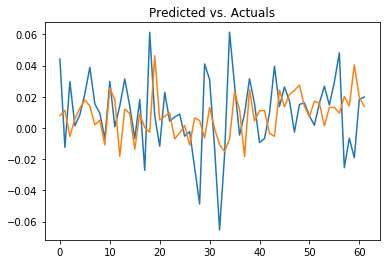

In [145]:
plt.plot(sandp_lag_sort_valid['monthly_avg_return_nolag'].values)
plt.plot(model3.predict(X_valid1))
plt.title('Predicted vs. Actuals')

In [126]:

from sklearn.model_selection import TimeSeriesSplit

In [127]:
print('hey')

hey


In [128]:
import statsmodels.api as sm
from scipy import stats
est = sm.OLS(y_valid1,X_valid1)

/Users/matthewvitha/anaconda/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [129]:
est2 = est.fit()

In [130]:
print(est2.summary())

                               OLS Regression Results                               
Dep. Variable:     monthly_avg_return_nolag   R-squared:                       0.759
Model:                                  OLS   Adj. R-squared:                  0.546
Method:                       Least Squares   F-statistic:                     3.575
Date:                      Tue, 18 Sep 2018   Prob (F-statistic):           0.000276
Time:                              11:43:36   Log-Likelihood:                 142.85
No. Observations:                        62   AIC:                            -227.7
Df Residuals:                            33   BIC:                            -166.0
Df Model:                                29                                         
Covariance Type:                  nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------